In [1290]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [1291]:
df = pd.read_csv('dataset.csv')

In [1292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [1293]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

We will fill the null values with mode values for that columns for object variables and with mean for float

In [1294]:
for i in df.select_dtypes(include='object').columns:
    df[i].fillna(df[i].mode()[0],inplace=True)

/var/folders/jy/51cp4g1n5_x_1t696_dkr24c0000gn/T/ipykernel_7607/2459431018.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0],inplace=True)


In [1295]:
for i in df.select_dtypes(include='number').columns:
    df[i].fillna(df[i].mean(),inplace=True)

/var/folders/jy/51cp4g1n5_x_1t696_dkr24c0000gn/T/ipykernel_7607/1993803101.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean(),inplace=True)


In [1296]:
df = df.iloc[:,1:]

Since Machine Learning model can only takes numerical values therefore we will use endoding method (label encoding which will arange everything in ascending order)

In [1297]:
for i in ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[[i]])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sk

Yes = 1 , No = 0
Male = 1 , Female = 0
Married_Yes = 1 , Married_No = 0
Property_Area Urban = 2 , Rural = 0 , Semiurban = 1

In [1298]:
df['Dependents'].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

3+ will be considered as lets say 4

In [1299]:
df['Dependents'].replace('3+',4,inplace=True)

/var/folders/jy/51cp4g1n5_x_1t696_dkr24c0000gn/T/ipykernel_7607/1453846192.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].replace('3+',4,inplace=True)


In [1300]:
df['Dependents'] = df['Dependents'].astype(int)

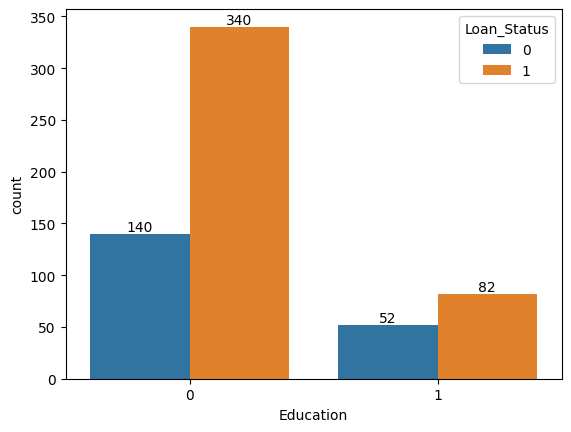

In [1301]:
ax = sns.countplot(x='Education',hue='Loan_Status',data=df)
for i in ax.containers:
    ax.bar_label(i)

In [1302]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,4,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


Now if we look at df then we will find that our number vary from 0 , 1 to 7000+ so to scale everyone in such a way that no one type of values becomes dominant ,therefore we are going to use Scaling Method 

In [1303]:
x = df.iloc[:,:-1]
y = df.iloc[:,[-1]]

In [1304]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = pd.DataFrame(ss.fit_transform(x),columns=x.columns)

In [1305]:
from imblearn.over_sampling import RandomOverSampler
ro = RandomOverSampler()
x,y = ro.fit_resample(x,y)

In [1306]:
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state=0,test_size=0.2)

SVM Method

In [1307]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [1308]:
print(f"The accuracy of the testing data for SVM model is {round(sv.score(x_test,y_test)*100 ,4)}%")

The accuracy of the testing data for SVM model is 74.5562%


Random Forest Method

In [1309]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [1310]:
print(f"The accuracy of the testing data for Random Forest Classifier model is {round(rfc.score(x_test,y_test)*100 ,4)}%")

The accuracy of the testing data for Random Forest Classifier model is 89.9408%


Decision Trees Method

In [1311]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [1312]:
print(f"The accuracy of the testing data for Decision Trees model is {round(dtc.score(x_test,y_test)*100 ,4)}%")

The accuracy of the testing data for Decision Trees model is 88.1657%


Naive Bayes Method

In [1313]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train,y_train)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

In [1314]:
print(f"The accuracy of the testing data for Bernoille Naive Bayes model is {round(bnb.score(x_test,y_test)*100 ,4)}%")

The accuracy of the testing data for Bernoille Naive Bayes model is 67.4556%


In [1315]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [1316]:
print(f"The accuracy of the testing data for Gaussian Naive Bayes model is {round(gnb.score(x_test,y_test)*100 ,4)}%")

The accuracy of the testing data for Gaussian Naive Bayes model is 71.5976%


K neighbours Model

In [1317]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=50)
knc.fit(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=50)

In [1318]:
print(f"The accuracy of the testing data for SVM model is {round(knc.score(x_test,y_test)*100 ,4)}%")

The accuracy of the testing data for SVM model is 69.8225%


From here we can see Random Forest is the best model to use so  now we are going to find out the range of accuracy for Random Forest Model using Cross_Val_Score  

In [1319]:
from sklearn.model_selection import cross_val_score,KFold
cvs = cross_val_score(rfc,x_train,y_train,cv=KFold(n_splits=20))
cvs

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklea

array([0.94117647, 0.82352941, 0.94117647, 0.85294118, 0.85294118,
       0.88235294, 0.88235294, 0.94117647, 0.85294118, 0.88235294,
       0.94117647, 0.88235294, 0.94117647, 0.94117647, 0.94117647,
       0.90909091, 0.84848485, 0.90909091, 0.93939394, 0.90909091])

In [1320]:
print(f"the mean of cross validation score for SVM MODEL  is {100 *cvs.mean()} ,standard deviation is {100*cvs.std()} , max value is {100*cvs.max()}")

the mean of cross validation score for SVM MODEL  is 90.07575757575756 ,standard deviation is 3.876060183518215 , max value is 94.11764705882352


Since the Max value for Random Forest model is 97 So we will try to bring it as close at possible Using HYPERTUNING

In [1321]:
param = {'criterion' : ["gini", "entropy", "log_loss"],'max_depth':np.linspace(0,45,5).astype(int),'n_estimators':np.linspace(100,1000,10).astype(int)}

In [1322]:
gs = GridSearchCV(rfc,param_grid=param)
gs.fit(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklea

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([ 0, 11, 22, 33, 45]),
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])})

In [1329]:
rfc1 = RandomForestClassifier(criterion='entropy', max_depth=33, n_estimators=400)
rfc1.fit(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', max_depth=33, n_estimators=400)

In [1330]:
print(f"The accuracy of the testing data for new Hypertuned SVM model is {round(rfc1.score(x_test,y_test)*100 ,4)}%")

The accuracy of the testing data for new Hypertuned SVM model is 89.3491%


In [1331]:
rfc1.predict(x_test)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1])

In [1332]:
y_test.to_numpy().reshape(y_test.shape[0],)

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1])

In [1333]:
from sklearn.metrics import confusion_matrix
cm  = confusion_matrix(y_test,rfc1.predict(x_test))

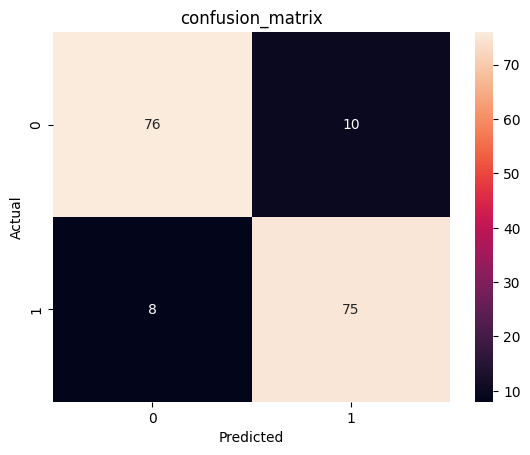

In [1338]:
sns.heatmap(cm,annot=True)
plt.title('confusion_matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
